In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df  

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] =  np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [13]:
# INdependent and dependent feature

X = df.drop('FWI',axis=1)
y = df['FWI']

In [16]:
# Train and Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [19]:
# Feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,NaN
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,NaN
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,NaN
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,NaN
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,NaN
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,NaN
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,NaN
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,NaN
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,NaN
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,NaN


<Axes: >

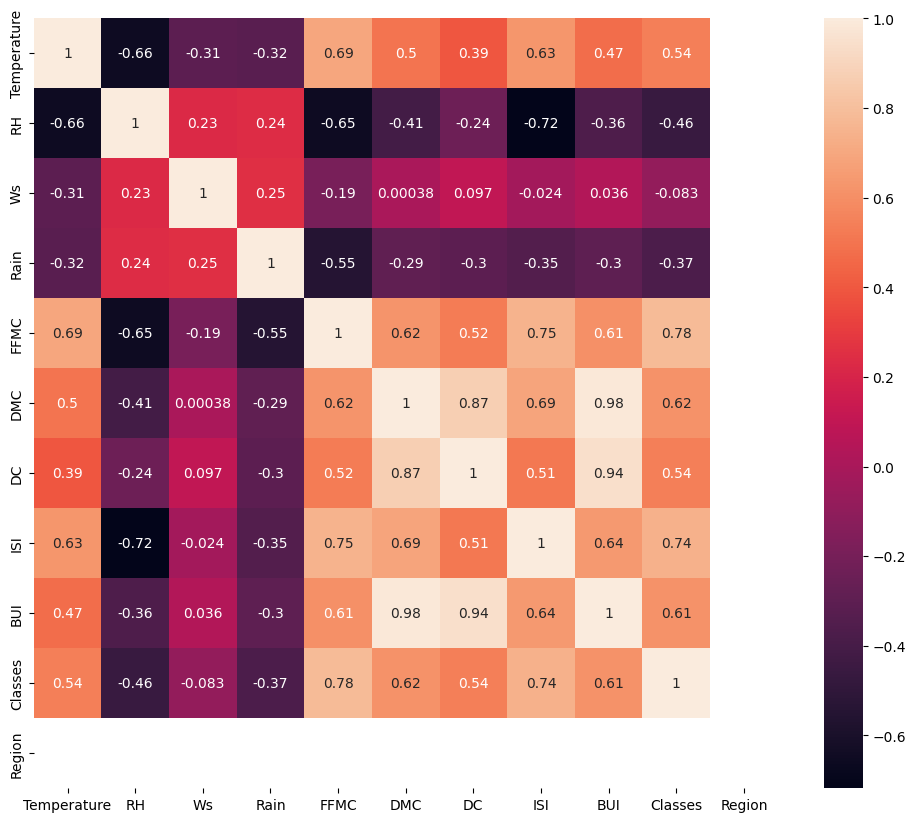

In [20]:
# Check for Multi collinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [23]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [27]:
# drop feature when correplation is more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [32]:
# Standardisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

Text(0.5, 1.0, 'X Train after scaling')

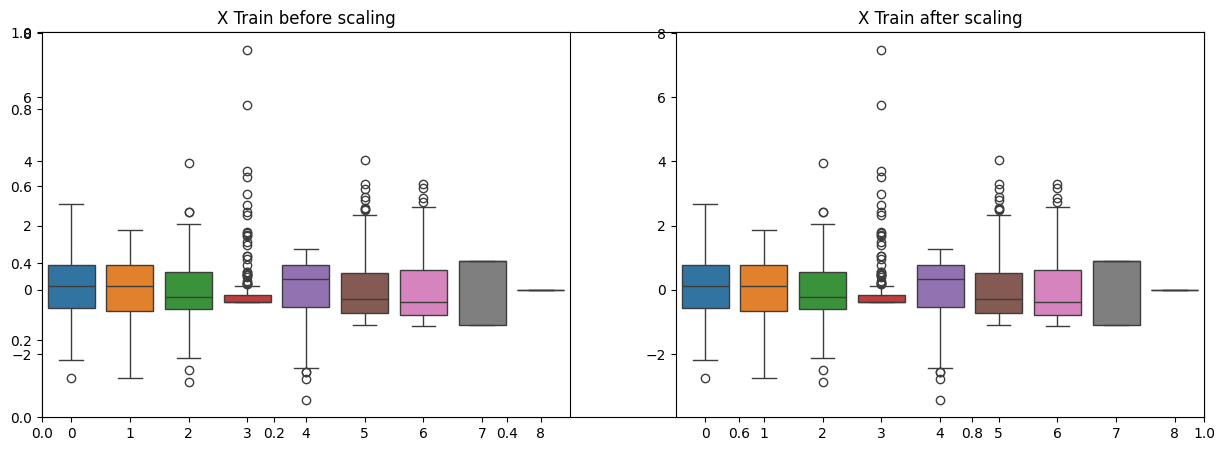

In [33]:
# Box plot to understand effect of standard scler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X Train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X Train after scaling')


In [34]:
# Linear Rigression Model


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred_test = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

score = r2_score(y_test,y_pred_test)

print(mse)
print(mae)
print(rmse)
print(score)

0.8011524407803163
0.5842707645701558
0.8950711931351139
0.9818991727411215


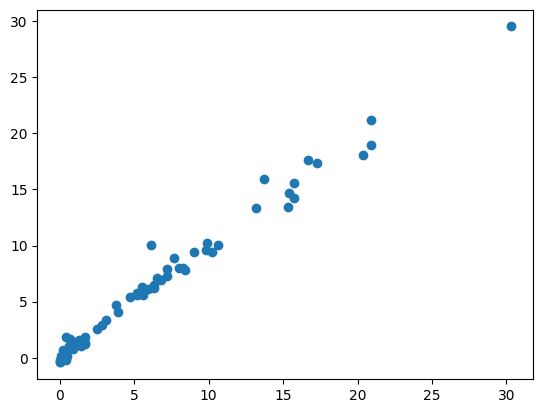

In [35]:
plt.scatter(y_test,y_pred_test)

Lasso Regression

2.2483458918974737
1.133175994914408
1.4994485292591653
0.9818991727411215
0.949202026311239


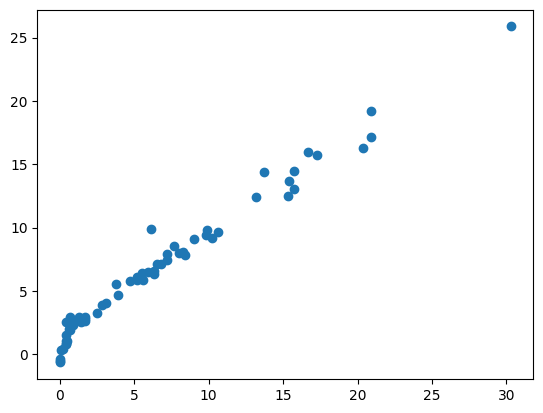

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score


lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred= lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)



Cross Validation Lasso

In [50]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)

lassoCV.fit(X_train_scaled,y_train)



LassoCV(cv=5)

1.2817203158936281
0.8264308494715193
1.1321308740130833
0.9710414687002776
0.9710414687002776


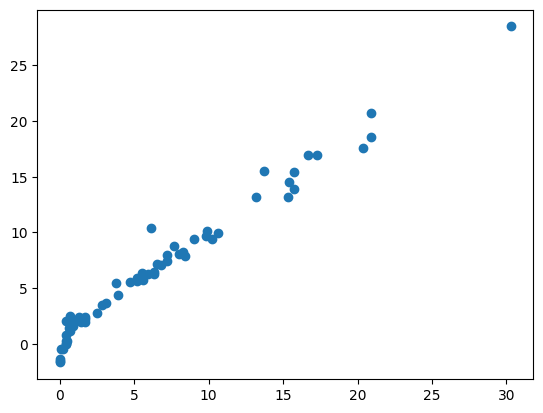

In [51]:

y_pred= lassoCV.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)

Ridge Regression Model

0.8274648379229498
0.6006561235951371
0.9096509429022485
0.9710414687002776
0.9813046839382391


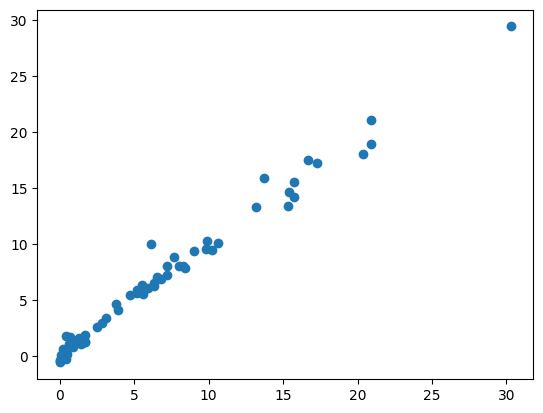

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score


ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred= ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)

Ridge cross validation

In [53]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)

ridgeCV.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

1.1755407668829314
0.8057412365870248
1.0842235779039908
0.9813046839382391
0.9734404349609262


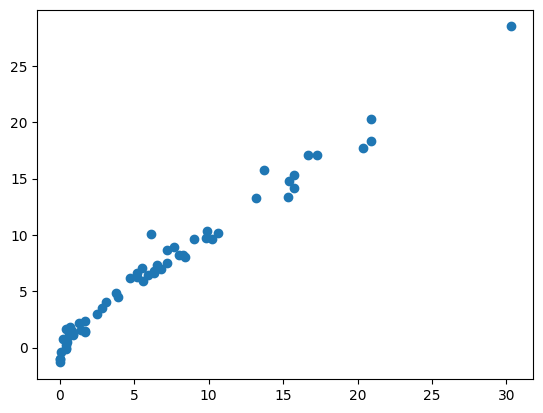

In [54]:

y_pred= ridgeCV.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)

In [55]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Elasticnet Regression

5.517251101025222
1.8822353634895996
2.348882947493387
0.9734404349609262
0.8753460589519704


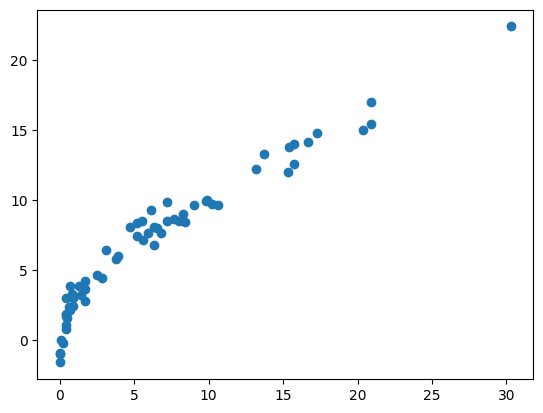

In [56]:
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred= elasticnet.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)

Elasticnet CV

In [57]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)

elasticnetcv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)

1.0195757936329501
0.7245910057301359
1.009740458550092
0.8753460589519704
0.9769642275571067


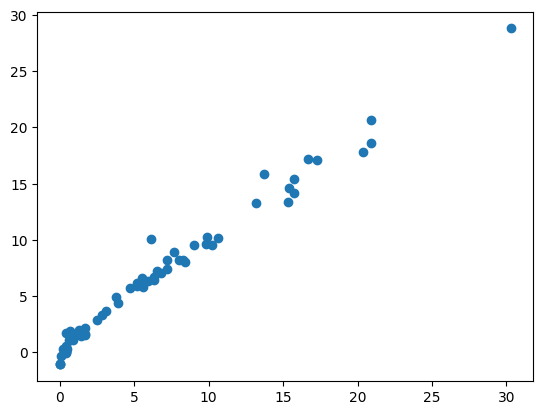

In [58]:
y_pred= elasticnetcv.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)
print(score)

score = r2_score(y_test,y_pred)
print(score)

plt.scatter(y_test,y_pred)

# SO her We use ridge bacause its accuracy is heigher tha others

# pickle

In [59]:
scaler  

StandardScaler()

In [60]:
ridge

Ridge()

In [61]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(scaler,open('ridge.pkl','wb'))